In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.misc import imread

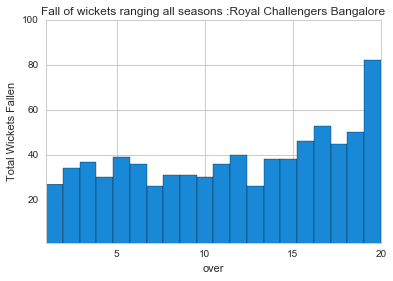

In [8]:
import numpy as np
from datetime import datetime
import os
import sys
import glob
import pandas as pd
import argparse
#parser = argparse.ArgumentParser()
#parser.add_argument("--Team", help="provide a search term, latitude, longitude and radius")
#parser.add_argument("--location", help="provide a search term, latitude, longitude and radius")
#args = parser.parse_args()
batting_team = 'Royal Challengers Bangalore'
dict_1 = {}
dict_2 = {}
#d = {'Royal Challengers Bangalore' : ,"Mumbai Indians" : , "Chennai Super Kings" : , "Deccan Chargers ": , "Rising Pune Supergiants ":}
x = glob.glob(r'C:\Users\aniru\Desktop\Season\*.csv')
appended_data = []
for g in  x :
    df1 = pd.read_csv(g)
    if batting_team in df1['batting_team'].unique().tolist() :           #check if the team has played the particular season
        df2 = analysis_3(df1, batting_team)
        appended_data.append(df2)
appended_data = pd.concat(appended_data, axis=0)
appended_data = appended_data.reset_index()
appended_data = appended_data.set_index(['over'])
a = appended_data['total_wickets'].reset_index()
b = a['total_wickets'].tolist()
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)
ax.hist(b, bins=20, color='#1888D7')
ax.set_xlabel('over')
ax.set_ylabel('Total Wickets Fallen')
plt.xlim(1,20)
plt.ylim(1,100)
ax.set_title('Fall of wickets ranging all seasons :' + batting_team)
sns.set_style("whitegrid")

In [1]:
def analysis_3( df, batting_team ) :                            #Performs analysis on the data. Accepts a team name. 
    df = df[df['batting_team'] == batting_team]
    l = []
    for j in df.over.unique().tolist() :                        #gets data for a over
        df2 = df[df['over'] == j]                                 
        df2 = df2.set_index(['over'] , drop = True)           
        df2 = df2[['season','batting_team', 'player_dismissed' , 'dismissal_kind']]
        df2['player_dismissed'].fillna(0, inplace=True)         #fill NaNs with 0
        #df2['dismissal_kind'].fillna(0, inplace=True)
         #df2['dismissal_kind'].fillna(0, inplace=True)
        df2 = df2[df2['player_dismissed'] != 0]                # extract data if only a palyer is dismissed. 
        #df2.loc[j,'run_outs'] = len(df2[df2['dismissal_kind'] == 'run out'])
        #df2.loc[j,'total_wickets'] = len(df2[df2['player_dismissed'] != 0])
        df2.loc[j,'total_wickets'] = j                        #create a coloumn called total_wickets and place the over at which the wicket fell.
        df2 = df2[['season' , 'batting_team' , 'total_wickets']]
        l.append(df2)                                         #append it to l
    l = pd.concat(l, axis=0)                                  #get for all overs. 
    return l